# Topic Modeling Clustering

In this notebook we visualize a previously generated topic model.

# Set Up

## Imports

In [1]:
import pandas as pd
import numpy as np
from lib import tapi

## Configuration

In [2]:
tapi.list_dbs()

['anphoblacht',
 'jstor_hyperparameter',
 'jstor_hyperparameter_demo',
 'okcupid',
 'tamilnet',
 'winereviews']

In [3]:
data_prefix = 'tamilnet'

In [4]:
db = tapi.Edition(data_prefix)

## Import Topic Data

We import our previously generated model.

In [5]:
db.get_tables()

LABELS
VOCAB
BOW
TOPICS
DTM
THETA
PHI
TOPICS_NMF
THETA_NMF
PHI_NMF


# Inspect Results

## PyLDAViz

We visualize the LDA model using PyLDAViz, a nice visualization tool based on R's LDAViz. See https://www.aclweb.org/anthology/W14-3110/ for more information about the concepts behind the visualization.

In [6]:
db.pyldaviz()

## Sort Topics by Doc Weight

/Users/rca2t1/anaconda3/envs/eta/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


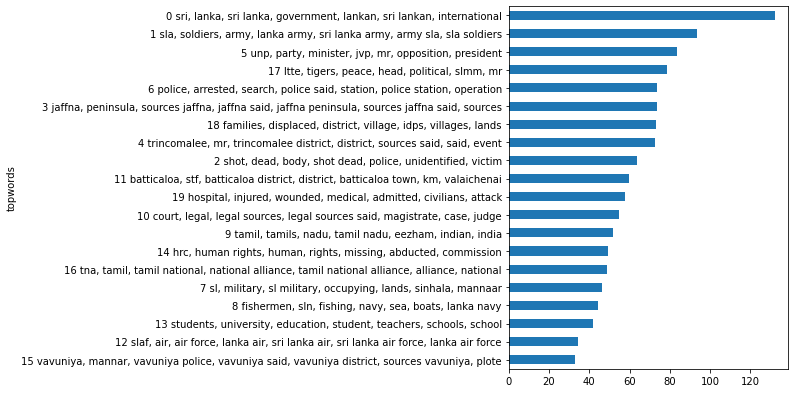

In [7]:
db.TOPICS_NMF.sort_values('doc_weight_sum', ascending=True)\
    .plot.barh(y='doc_weight_sum', x='topwords', figsize=(5, db.n_topics/3), legend=False);

/Users/rca2t1/anaconda3/envs/eta/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


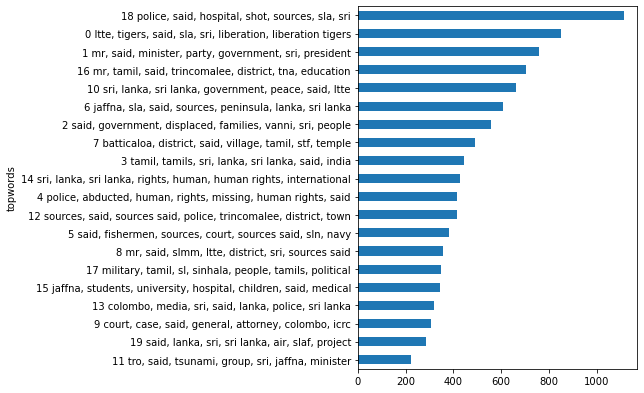

In [8]:
db.TOPICS.sort_values('doc_weight_sum', ascending=True)\
    .plot.barh(y='doc_weight_sum', x='topwords', figsize=(5, db.n_topics/3), legend=False);

## Clutser Topics

In [9]:
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

/Users/rca2t1/anaconda3/envs/eta/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
def plot_tree(tree, labels):
    plt.figure()
    fig, axes = plt.subplots(figsize=(5, db.n_topics / 3))
    dendrogram = sch.dendrogram(tree, labels=labels, orientation="left")
    plt.tick_params(axis='both', which='major', labelsize=14)

/Users/rca2t1/anaconda3/envs/eta/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
SIMS = pdist(normalize(db.PHI), metric='cosine')
TREE = sch.linkage(SIMS, method='ward')

/Users/rca2t1/anaconda3/envs/eta/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/rca2t1/anaconda3/envs/eta/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 432x288 with 0 Axes>

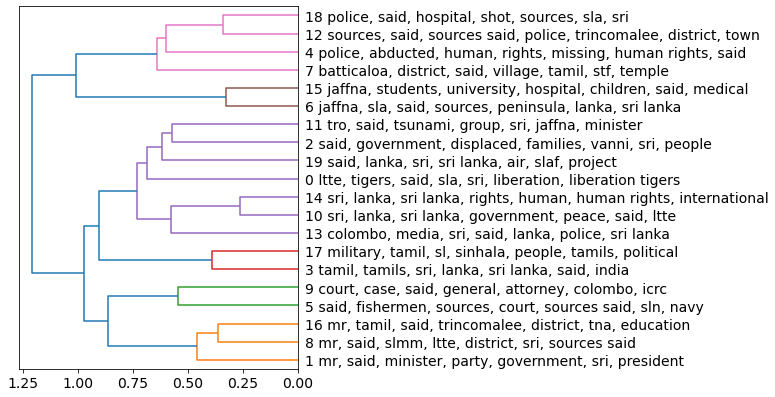

In [12]:
plot_tree(TREE, db.TOPICS.topwords.to_list());

In [13]:
SIMS = pdist(normalize(db.PHI_NMF), metric='cosine')
TREE = sch.linkage(SIMS, method='ward')

/Users/rca2t1/anaconda3/envs/eta/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/rca2t1/anaconda3/envs/eta/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 432x288 with 0 Axes>

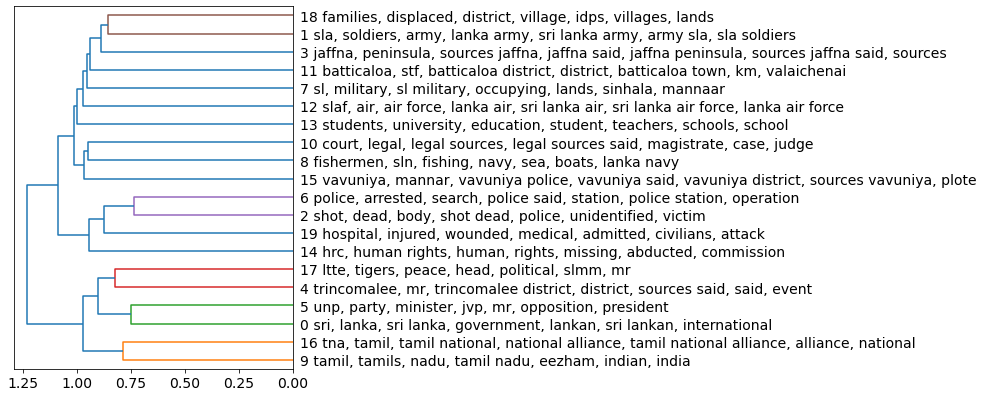

In [14]:
plot_tree(TREE, db.TOPICS_NMF.topwords.to_list());

## Group Topics by Label

In [15]:
db.LABELS.columns

/Users/rca2t1/anaconda3/envs/eta/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['doc_title', 'doc_uri', 'doc_label', 'doc_ord', 'doc_year',
       'doc_citation', 'doc_date'],
      dtype='object')

In [16]:
group_col = 'doc_label'

/Users/rca2t1/anaconda3/envs/eta/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
group_vals = db.LABELS[group_col].value_counts().to_frame('n')
group_vals.index.name = 'group_id'

/Users/rca2t1/anaconda3/envs/eta/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
group_vals

/Users/rca2t1/anaconda3/envs/eta/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,n
group_id,
2006,1104
2008,935
2007,903
2009,842
2004,795
2005,741
2003,699
2010,614
1999,595


In [19]:
# group_vals.sort_values('n').plot.barh(figsize=(5,len(group_vals) / 3), legend=False);

/Users/rca2t1/anaconda3/envs/eta/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
G = db.THETA.join(db.LABELS).groupby(group_col)[db.topic_cols].mean()
G.index.name = 'group_id'
G.columns = db.TOPICS.topwords

/Users/rca2t1/anaconda3/envs/eta/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
G2 = db.THETA_NMF.join(db.LABELS).groupby(group_col)[db.topic_cols].mean()
G2.index.name = 'group_id'
G2.columns = db.TOPICS_NMF.topwords

/Users/rca2t1/anaconda3/envs/eta/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Heatmap of Labels and Topics

In [37]:
G.style.background_gradient()

/Users/rca2t1/anaconda3/envs/eta/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


topwords,"0 ltte, tigers, said, sla, sri, liberation, liberation tigers","1 mr, said, minister, party, government, sri, president","2 said, government, displaced, families, vanni, sri, people","3 tamil, tamils, sri, lanka, sri lanka, said, india","4 police, abducted, human, rights, missing, human rights, said","5 said, fishermen, sources, court, sources said, sln, navy","6 jaffna, sla, said, sources, peninsula, lanka, sri lanka","7 batticaloa, district, said, village, tamil, stf, temple","8 mr, said, slmm, ltte, district, sri, sources said","9 court, case, said, general, attorney, colombo, icrc","10 sri, lanka, sri lanka, government, peace, said, ltte","11 tro, said, tsunami, group, sri, jaffna, minister","12 sources, said, sources said, police, trincomalee, district, town","13 colombo, media, sri, said, lanka, police, sri lanka","14 sri, lanka, sri lanka, rights, human, human rights, international","15 jaffna, students, university, hospital, children, said, medical","16 mr, tamil, said, trincomalee, district, tna, education","17 military, tamil, sl, sinhala, people, tamils, political","18 police, said, hospital, shot, sources, sla, sri","19 said, lanka, sri, sri lanka, air, slaf, project"
group_id,,,,,,,,,,,,,,,,,,,,
1997,0.247914,0.022342,0.109757,0.045480,0.020416,0.016335,0.100742,0.068223,0.004183,0.016299,0.063330,0.022976,0.006522,0.005254,0.017891,0.028074,0.045320,0.032729,0.112340,0.013874
1998,0.214783,0.045377,0.096648,0.023604,0.027421,0.027007,0.098363,0.070163,0.008604,0.028668,0.034383,0.021939,0.023925,0.024329,0.023897,0.028181,0.043657,0.012331,0.127543,0.019179
1999,0.156334,0.065317,0.100939,0.013921,0.043382,0.032447,0.064267,0.050198,0.008407,0.087367,0.036456,0.016782,0.044009,0.017421,0.019625,0.016725,0.056032,0.008434,0.141714,0.020225
2000,0.178293,0.106031,0.038381,0.029677,0.022928,0.035820,0.053402,0.050135,0.005598,0.067232,0.069107,0.011462,0.043298,0.021347,0.018983,0.027392,0.054143,0.009284,0.142032,0.015455
2001,0.103871,0.175206,0.047094,0.043810,0.039911,0.039745,0.032252,0.059359,0.010811,0.043355,0.094293,0.008439,0.034732,0.022629,0.019963,0.024528,0.088805,0.022627,0.074073,0.014498
2002,0.043592,0.140826,0.040826,0.025810,0.020096,0.057569,0.055507,0.041537,0.115626,0.060987,0.121452,0.017262,0.037880,0.014911,0.015541,0.023912,0.120670,0.009334,0.023153,0.013507
2003,0.045628,0.118274,0.058749,0.017323,0.017595,0.064684,0.057961,0.042163,0.120477,0.022793,0.082180,0.021430,0.059943,0.018251,0.009253,0.027077,0.152704,0.011221,0.028471,0.023821
2004,0.043912,0.139880,0.049108,0.023921,0.017176,0.057938,0.035743,0.033174,0.084423,0.015973,0.088743,0.029809,0.044644,0.021510,0.012516,0.026982,0.170911,0.019341,0.064151,0.020146
2005,0.032753,0.096104,0.034392,0.017556,0.014199,0.042735,0.036754,0.030948,0.079756,0.015487,0.114865,0.056449,0.060411,0.034590,0.014099,0.027681,0.115201,0.011891,0.137422,0.026708


In [38]:
G2.style.background_gradient()

/Users/rca2t1/anaconda3/envs/eta/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


topwords,"0 sri, lanka, sri lanka, government, lankan, sri lankan, international","1 sla, soldiers, army, lanka army, sri lanka army, army sla, sla soldiers","2 shot, dead, body, shot dead, police, unidentified, victim","3 jaffna, peninsula, sources jaffna, jaffna said, jaffna peninsula, sources jaffna said, sources","4 trincomalee, mr, trincomalee district, district, sources said, said, event","5 unp, party, minister, jvp, mr, opposition, president","6 police, arrested, search, police said, station, police station, operation","7 sl, military, sl military, occupying, lands, sinhala, mannaar","8 fishermen, sln, fishing, navy, sea, boats, lanka navy","9 tamil, tamils, nadu, tamil nadu, eezham, indian, india","10 court, legal, legal sources, legal sources said, magistrate, case, judge","11 batticaloa, stf, batticaloa district, district, batticaloa town, km, valaichenai","12 slaf, air, air force, lanka air, sri lanka air, sri lanka air force, lanka air force","13 students, university, education, student, teachers, schools, school","14 hrc, human rights, human, rights, missing, abducted, commission","15 vavuniya, mannar, vavuniya police, vavuniya said, vavuniya district, sources vavuniya, plote","16 tna, tamil, tamil national, national alliance, tamil national alliance, alliance, national","17 ltte, tigers, peace, head, political, slmm, mr","18 families, displaced, district, village, idps, villages, lands","19 hospital, injured, wounded, medical, admitted, civilians, attack"
group_id,,,,,,,,,,,,,,,,,,,,
1997,0.016106,0.014933,0.003791,0.011782,0.001371,0.003067,0.004871,0.003737,0.002696,0.004038,0.001154,0.009201,0.003408,0.002143,0.002167,0.007282,0.002250,0.006224,0.003311,0.005249
1998,0.010243,0.017293,0.004344,0.011610,0.003339,0.005710,0.006356,0.001848,0.003336,0.001972,0.003302,0.010047,0.003916,0.002247,0.003799,0.007611,0.001423,0.006509,0.004982,0.005639
1999,0.008708,0.017330,0.003724,0.006999,0.004120,0.008381,0.008715,0.001225,0.003610,0.001700,0.007599,0.006619,0.003621,0.004212,0.004763,0.010823,0.001310,0.003930,0.006620,0.006961
2000,0.011200,0.016680,0.003107,0.006001,0.004608,0.010675,0.007512,0.001095,0.003600,0.003110,0.005393,0.008026,0.004008,0.004047,0.002757,0.004648,0.002619,0.006072,0.003180,0.009451
2001,0.013900,0.009502,0.002607,0.004222,0.006211,0.020569,0.006646,0.001384,0.005641,0.004901,0.005617,0.008320,0.003016,0.006092,0.004638,0.004754,0.007532,0.007892,0.003880,0.005981
2002,0.015413,0.005301,0.001162,0.006567,0.013731,0.012351,0.004694,0.001171,0.006612,0.003023,0.008868,0.004293,0.002368,0.006357,0.002723,0.002692,0.009422,0.016698,0.006080,0.002337
2003,0.010605,0.006322,0.001869,0.006665,0.017984,0.010060,0.005292,0.001133,0.006558,0.002813,0.007275,0.004664,0.000536,0.005838,0.002713,0.002996,0.005506,0.018288,0.010591,0.002256
2004,0.010978,0.004091,0.004087,0.006741,0.016483,0.012949,0.005394,0.000950,0.004060,0.003251,0.007008,0.006454,0.001022,0.004919,0.002600,0.003733,0.010789,0.014413,0.007754,0.002621
2005,0.012913,0.006459,0.007498,0.005807,0.016929,0.009716,0.006158,0.001086,0.004317,0.002261,0.004790,0.006419,0.000982,0.004841,0.002112,0.002319,0.005365,0.011810,0.007944,0.005039


### Top Topic per Label Group

In [39]:
group_vals['top_topic'] = G.T[group_vals.index].idxmax()
group_vals['top_topic2'] = G2.T[group_vals.index].idxmax()

/Users/rca2t1/anaconda3/envs/eta/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
group_vals.sort_values('top_topic')

/Users/rca2t1/anaconda3/envs/eta/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,n,top_topic,top_topic2
group_id,,,
1998,585,"0 ltte, tigers, said, sla, sri, liberation, li...","1 sla, soldiers, army, lanka army, sri lanka a..."
1997,190,"0 ltte, tigers, said, sla, sri, liberation, li...","0 sri, lanka, sri lanka, government, lankan, s..."
1999,595,"0 ltte, tigers, said, sla, sri, liberation, li...","1 sla, soldiers, army, lanka army, sri lanka a..."
2000,364,"0 ltte, tigers, said, sla, sri, liberation, li...","1 sla, soldiers, army, lanka army, sri lanka a..."
2010,614,"1 mr, said, minister, party, government, sri, ...","0 sri, lanka, sri lanka, government, lankan, s..."
2001,264,"1 mr, said, minister, party, government, sri, ...","5 unp, party, minister, jvp, mr, opposition, p..."
2002,405,"1 mr, said, minister, party, government, sri, ...","17 ltte, tigers, peace, head, political, slmm, mr"
2011,300,"14 sri, lanka, sri lanka, rights, human, human...","0 sri, lanka, sri lanka, government, lankan, s..."
2004,795,"16 mr, tamil, said, trincomalee, district, tna...","4 trincomalee, mr, trincomalee district, distr..."


### Top Label Group per Topic

In [26]:
G.idxmax().to_frame('label').sort_values('label')

/Users/rca2t1/anaconda3/envs/eta/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,label
topwords,
"0 ltte, tigers, said, sla, sri, liberation, liberation tigers",1997
"2 said, government, displaced, families, vanni, sri, people",1997
"9 court, case, said, general, attorney, colombo, icrc",1999
"1 mr, said, minister, party, government, sri, president",2001
"10 sri, lanka, sri lanka, government, peace, said, ltte",2002
"5 said, fishermen, sources, court, sources said, sln, navy",2003
"8 mr, said, slmm, ltte, district, sri, sources said",2003
"16 mr, tamil, said, trincomalee, district, tna, education",2004
"11 tro, said, tsunami, group, sri, jaffna, minister",2005


In [27]:
G2.idxmax().to_frame('label').sort_values('label')

/Users/rca2t1/anaconda3/envs/eta/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,label
topwords,
"3 jaffna, peninsula, sources jaffna, jaffna said, jaffna peninsula, sources jaffna said, sources",1997
"11 batticaloa, stf, batticaloa district, district, batticaloa town, km, valaichenai",1998
"1 sla, soldiers, army, lanka army, sri lanka army, army sla, sla soldiers",1999
"15 vavuniya, mannar, vavuniya police, vavuniya said, vavuniya district, sources vavuniya, plote",1999
"19 hospital, injured, wounded, medical, admitted, civilians, attack",2000
"5 unp, party, minister, jvp, mr, opposition, president",2001
"10 court, legal, legal sources, legal sources said, magistrate, case, judge",2002
"4 trincomalee, mr, trincomalee district, district, sources said, said, event",2003
"17 ltte, tigers, peace, head, political, slmm, mr",2003


## How Similar are the Topics to Each Other?

In [28]:
X = db.THETA.T.dot(db.THETA_NMF)
X.columns = db.TOPICS_NMF.topwords
X.index = db.TOPICS.topwords
X.columns.name = 'NMF'
X.index.name = 'LDA'

/Users/rca2t1/anaconda3/envs/eta/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
# X.style.background_gradient()

/Users/rca2t1/anaconda3/envs/eta/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
# X.T.style.background_gradient()

/Users/rca2t1/anaconda3/envs/eta/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
X2 = X.stack().to_frame('w').sort_values('w', ascending=False)

/Users/rca2t1/anaconda3/envs/eta/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
X2.head(10).style.bar()

/Users/rca2t1/anaconda3/envs/eta/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,,w
LDA,NMF,
"1 mr, said, minister, party, government, sri, president","5 unp, party, minister, jvp, mr, opposition, president",43.243844
"18 police, said, hospital, shot, sources, sla, sri","2 shot, dead, body, shot dead, police, unidentified, victim",36.102234
"10 sri, lanka, sri lanka, government, peace, said, ltte","0 sri, lanka, sri lanka, government, lankan, sri lankan, international",27.056950
"0 ltte, tigers, said, sla, sri, liberation, liberation tigers","1 sla, soldiers, army, lanka army, sri lanka army, army sla, sla soldiers",27.000888
"18 police, said, hospital, shot, sources, sla, sri","19 hospital, injured, wounded, medical, admitted, civilians, attack",22.637593
"14 sri, lanka, sri lanka, rights, human, human rights, international","0 sri, lanka, sri lanka, government, lankan, sri lankan, international",22.589283
"16 mr, tamil, said, trincomalee, district, tna, education","4 trincomalee, mr, trincomalee district, district, sources said, said, event",20.109079
"2 said, government, displaced, families, vanni, sri, people","18 families, displaced, district, village, idps, villages, lands",20.090065
"3 tamil, tamils, sri, lanka, sri lanka, said, india","9 tamil, tamils, nadu, tamil nadu, eezham, indian, india",18.599877


In [33]:
# X2.w.hist();

/Users/rca2t1/anaconda3/envs/eta/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
# X2.w.sort_values(ascending=False).head(40).sort_values().plot.barh(figsize=(10,20))

/Users/rca2t1/anaconda3/envs/eta/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
G

/Users/rca2t1/anaconda3/envs/eta/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


topwords,"0 ltte, tigers, said, sla, sri, liberation, liberation tigers","1 mr, said, minister, party, government, sri, president","2 said, government, displaced, families, vanni, sri, people","3 tamil, tamils, sri, lanka, sri lanka, said, india","4 police, abducted, human, rights, missing, human rights, said","5 said, fishermen, sources, court, sources said, sln, navy","6 jaffna, sla, said, sources, peninsula, lanka, sri lanka","7 batticaloa, district, said, village, tamil, stf, temple","8 mr, said, slmm, ltte, district, sri, sources said","9 court, case, said, general, attorney, colombo, icrc","10 sri, lanka, sri lanka, government, peace, said, ltte","11 tro, said, tsunami, group, sri, jaffna, minister","12 sources, said, sources said, police, trincomalee, district, town","13 colombo, media, sri, said, lanka, police, sri lanka","14 sri, lanka, sri lanka, rights, human, human rights, international","15 jaffna, students, university, hospital, children, said, medical","16 mr, tamil, said, trincomalee, district, tna, education","17 military, tamil, sl, sinhala, people, tamils, political","18 police, said, hospital, shot, sources, sla, sri","19 said, lanka, sri, sri lanka, air, slaf, project"
group_id,,,,,,,,,,,,,,,,,,,,
1997,0.247914,0.022342,0.109757,0.045480,0.020416,0.016335,0.100742,0.068223,0.004183,0.016299,0.063330,0.022976,0.006522,0.005254,0.017891,0.028074,0.045320,0.032729,0.112340,0.013874
1998,0.214783,0.045377,0.096648,0.023604,0.027421,0.027007,0.098363,0.070163,0.008604,0.028668,0.034383,0.021939,0.023925,0.024329,0.023897,0.028181,0.043657,0.012331,0.127543,0.019179
1999,0.156334,0.065317,0.100939,0.013921,0.043382,0.032447,0.064267,0.050198,0.008407,0.087367,0.036456,0.016782,0.044009,0.017421,0.019625,0.016725,0.056032,0.008434,0.141714,0.020225
2000,0.178293,0.106031,0.038381,0.029677,0.022928,0.035820,0.053402,0.050135,0.005598,0.067232,0.069107,0.011462,0.043298,0.021347,0.018983,0.027392,0.054143,0.009284,0.142032,0.015455
2001,0.103871,0.175206,0.047094,0.043810,0.039911,0.039745,0.032252,0.059359,0.010811,0.043355,0.094293,0.008439,0.034732,0.022629,0.019963,0.024528,0.088805,0.022627,0.074073,0.014498
2002,0.043592,0.140826,0.040826,0.025810,0.020096,0.057569,0.055507,0.041537,0.115626,0.060987,0.121452,0.017262,0.037880,0.014911,0.015541,0.023912,0.120670,0.009334,0.023153,0.013507
2003,0.045628,0.118274,0.058749,0.017323,0.017595,0.064684,0.057961,0.042163,0.120477,0.022793,0.082180,0.021430,0.059943,0.018251,0.009253,0.027077,0.152704,0.011221,0.028471,0.023821
2004,0.043912,0.139880,0.049108,0.023921,0.017176,0.057938,0.035743,0.033174,0.084423,0.015973,0.088743,0.029809,0.044644,0.021510,0.012516,0.026982,0.170911,0.019341,0.064151,0.020146
2005,0.032753,0.096104,0.034392,0.017556,0.014199,0.042735,0.036754,0.030948,0.079756,0.015487,0.114865,0.056449,0.060411,0.034590,0.014099,0.027681,0.115201,0.011891,0.137422,0.026708


/Users/rca2t1/anaconda3/envs/eta/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KeyError: 'm'

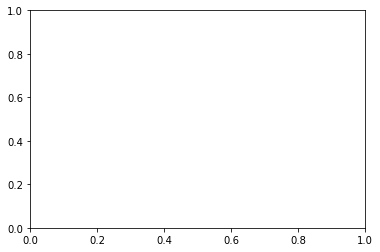

In [36]:
G.T.plot.scatter('m', 'f')

In [ ]:
G2.T.plot.scatter('m', 'f')